In [ ]:
# Mount Google Drive untuk mengakses file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import pustaka yang diperlukan
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
train_dir = '/content/drive/MyDrive/Data ML/Cataract/train'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # set validation split
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(416, 416),
    batch_size=32,
    class_mode='binary',  # or 'categorical' if more than 2 classes
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,  # same directory as training data
    target_size=(416, 416),
    batch_size=32,
    class_mode='binary',  # or 'categorical' if more than 2 classes
    subset='validation'
)

Found 329 images belonging to 2 classes.
Found 81 images belonging to 2 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(416, 416, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # or 'softmax' if more than 2 classes
])

model.compile(loss='binary_crossentropy',  # or 'categorical_crossentropy' if more than 2 classes
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 414, 414, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 207, 207, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 205, 205, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 102, 102, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 50, 50, 128)       0

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
10/10 [==============================] - 163s 15s/step - loss: 2.0250 - accuracy: 0.5556 - val_loss: 0.5965 - val_accuracy: 0.7812
Epoch 2/10
10/10 [==============================] - 144s 14s/step - loss: 0.5383 - accuracy: 0.7306 - val_loss: 0.2657 - val_accuracy: 0.8750
Epoch 3/10
10/10 [==============================] - 153s 15s/step - loss: 0.3700 - accuracy: 0.8586 - val_loss: 0.4024 - val_accuracy: 0.8438
Epoch 4/10
10/10 [==============================] - 137s 13s/step - loss: 0.3164 - accuracy: 0.8754 - val_loss: 0.2947 - val_accuracy: 0.8906
Epoch 5/10
10/10 [==============================] - 135s 13s/step - loss: 0.3124 - accuracy: 0.8687 - val_loss: 0.3570 - val_accuracy: 0.8906
Epoch 6/10
10/10 [==============================] - 146s 14s/step - loss: 0.2048 - accuracy: 0.9293 - val_loss: 0.9435 - val_accuracy: 0.7969
Epoch 7/10
10/10 [==============================] - 143s 15s/step - loss: 0.2907 - accuracy: 0.8620 - val_loss: 0.6145 - val_accuracy: 0.8438
Epoch 

In [ ]:
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

2/2 [==============================] - 11s 5s/step - loss: 0.8332 - accuracy: 0.7969
Validation Loss: 0.8331766128540039
Validation Accuracy: 0.796875


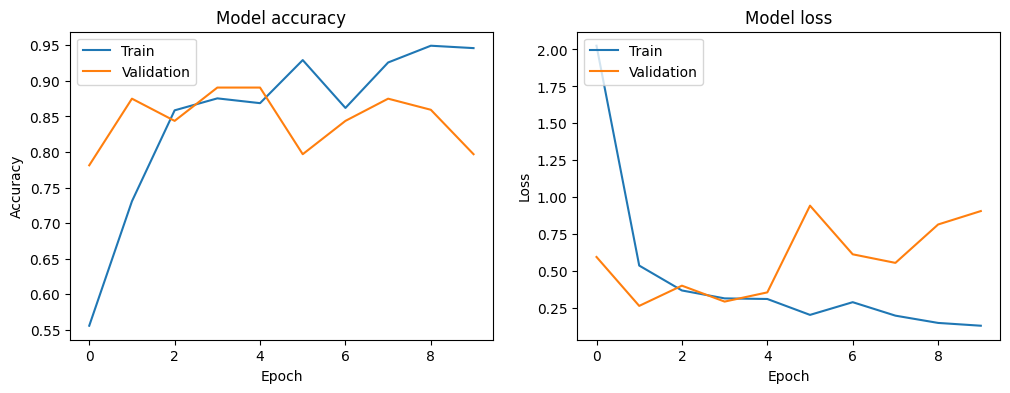

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Saving 11_JPG_jpg.rf.035003a80ea3903f616a87dea317f54e.jpg to 11_JPG_jpg.rf.035003a80ea3903f616a87dea317f54e.jpg
1/1 [==============================] - 0s 115ms/step


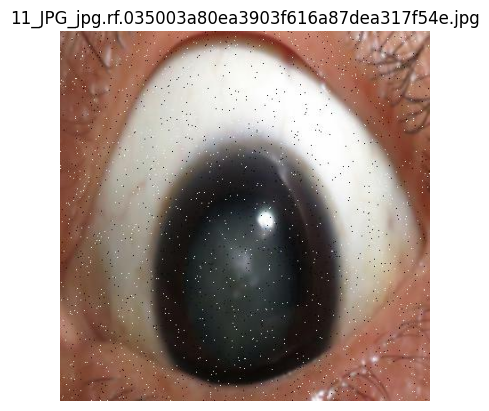

11_JPG_jpg.rf.035003a80ea3903f616a87dea317f54e.jpg is an immature cataract


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(416, 416))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    # Display the image
    plt.imshow(img)
    plt.title(fn)
    plt.axis('off')
    plt.show()

    # Print prediction results
    if classes[0] > 0.5:
        print(fn + " is a mature cataract")
    else:
        print(fn + " is an immature cataract")